## 데이터 로드

In [31]:
import json
import pandas as pd
import math
import numpy as np

with open('../Datasets/train.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [32]:
train_data = pd.DataFrame(json_data)
train_data = train_data.drop(['id', 'plylst_title', 'updt_date'], axis=1)
train_data.head()

,tags,songs,like_cnt
0,[락],"[525514, 129701, 383374, 562083, 297861, 13954...",71
1,"[추억, 회상]","[432406, 675945, 497066, 120377, 389529, 24427...",1
2,"[까페, 잔잔한]","[83116, 276692, 166267, 186301, 354465, 256598...",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...","[394031, 195524, 540149, 287984, 440773, 10033...",33
4,[댄스],"[159327, 553610, 5130, 645103, 294435, 100657,...",9


In [33]:
with open('../Datasets/song_meta_with_likes.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [34]:
song_data = pd.DataFrame(json_data)
song_data = song_data.drop(['album_name', 'song_gn_gnr_basket'], axis=1)
song_data.head()

,song_gn_dtl_gnr_basket,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,id,like_cnt_song
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234


## 데이터 열 이름 변경

In [35]:
train_data.rename(columns={'songs':'song_id'}, inplace=True)
train_data.head()

,tags,song_id,like_cnt
0,[락],"[525514, 129701, 383374, 562083, 297861, 13954...",71
1,"[추억, 회상]","[432406, 675945, 497066, 120377, 389529, 24427...",1
2,"[까페, 잔잔한]","[83116, 276692, 166267, 186301, 354465, 256598...",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...","[394031, 195524, 540149, 287984, 440773, 10033...",33
4,[댄스],"[159327, 553610, 5130, 645103, 294435, 100657,...",9


## 데이터 추출

- 500개의 플레이리스트 추출

In [36]:
train_data_sample = train_data[500:1000].copy()
train_data_sample = train_data_sample.reset_index(drop=True)
#train_data_sample = train_data

In [37]:
song_data.rename(columns={'id':'song_id', 'song_gn_dtl_gnr_basket': 'gnr'}, inplace=True)
song_data = song_data.astype({'issue_date':'int64'})
song_data.head()

,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,song_id,like_cnt_song
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234


## 노래별 가중치 설정

count    591216.000000
mean         18.528749
std          73.444383
min           0.005000
25%           0.302632
50%           1.509804
75%           8.990398
max        3548.345552
Name: like_cnt_song, dtype: float64

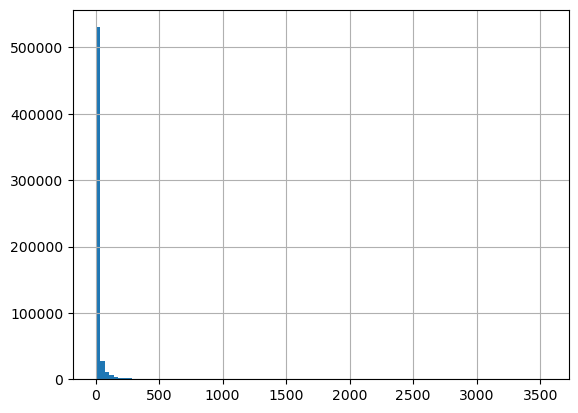

In [38]:
# 좋아요 개수 분포 확인을 위한 코드
clean_song_data = song_data[song_data['like_cnt_song'] > 0]
clean_song_data['like_cnt_song'].hist(bins=100)
clean_song_data['like_cnt_song'].describe()

In [39]:
bins = [-1, 0.001, 0.3, 1.5, 9, 3600]  # 구간 분할
labels = [0, 0.8, 0.85, 0.9, 0.95]  # 구간별 가중치 지정

song_data['weight'] = pd.cut(song_data['like_cnt_song'], bins=bins, labels=labels)  # 구간별 가중치 지정
song_data.head(10)

,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,song_id,like_cnt_song,weight
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807,0.85
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000,0.00
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000,0.00
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574,0.95
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234,0.80
5,[GN1701],20100602,911754,[475840],Para Los Enamorados,"[Bye, Lupita]",5,24.995233,0.95
6,"[GN1601, GN1602, GN1614]",20170208,10038397,"[162097, 100237]",Sibelius : Valse Triste Op.44 (시벨리우스 : 슬픈 왈츠 작...,"[Herbert Blomstedt, San Francisco Symphony]",6,0.857143,0.85
7,"[GN1601, GN1602, GN1614]",20190315,10261160,"[105210, 261542]",Superman March (From &#34;Superman&#34; / Live...,"[Los Angeles Philharmonic Orchestra, Gustavo D...",7,0.115385,0.80
8,[GN0301],20070625,353020,[224583],Lovers’ Leap (Feat. Qypthone),[애플스],8,0.000000,0.00
9,"[GN0105, GN0101]",20170320,10047088,[753752],"사랑, 그대라는 멜로디",[진호],9,7.006667,0.90


## 가중치 반영 여부 설정

In [40]:
likeWeight = True

# 한국어 -> 영어 변환
- 한국어 전처리에 어려움이 있어서, 영어로 모두 변환 후 처리

In [41]:
'''
from googletrans import Translator
import time

def trans_to_eng(tags):
    time.sleep(1)
    translator = Translator()
    translated = translator.translate(tags, src = 'ko', dest = 'en')
    return translated.text

for i in range(len(train_data_sample)):
    eng_tags = [trans_to_eng(tag) for tag in train_data_sample['tags'][i]]
    train_data_sample['tags'][i] = eng_tags

train_data_sample.to_json('../Datasets/train_eng1.json', orient='records')
train_data_sample.head(30)

    
#train_data.head()
#eng_tags = [trans_to_eng(tag) for tag in train_data['tags'][1]]
#print("Kor: ", train_data['tags'][1])
#print("Eng: ", eng_tags)
'''

'\nfrom googletrans import Translator\nimport time\n\ndef trans_to_eng(tags):\n    time.sleep(1)\n    translator = Translator()\n    translated = translator.translate(tags, src = \'ko\', dest = \'en\')\n    return translated.text\n\nfor i in range(len(train_data_sample)):\n    eng_tags = [trans_to_eng(tag) for tag in train_data_sample[\'tags\'][i]]\n    train_data_sample[\'tags\'][i] = eng_tags\n\ntrain_data_sample.to_json(\'../Datasets/train_eng1.json\', orient=\'records\')\ntrain_data_sample.head(30)\n\n    \n#train_data.head()\n#eng_tags = [trans_to_eng(tag) for tag in train_data[\'tags\'][1]]\n#print("Kor: ", train_data[\'tags\'][1])\n#print("Eng: ", eng_tags)\n'

In [42]:
'''
with open('../Datasets/train_eng.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)
 '''

"\nwith open('../Datasets/train_eng.json', 'r', encoding='utf-8') as f:\n    json_data = json.load(f)\n "

In [43]:
'''
train_data_eng = pd.DataFrame(json_data)
train_data_eng.head(10)
'''

'\ntrain_data_eng = pd.DataFrame(json_data)\ntrain_data_eng.head(10)\n'

# 태그 자연어 전처리

### 특수문자 및 공백 제외 + 대->소문자 변환

In [44]:
'''
import re

print(train_data_eng['tags'][3])
pattern = re.compile('[^a-zA-Z0-9]')#특수문자나 공백을 띄어쓰기로 처리할지는 이후 테스트
idx = 0
for tags in train_data_eng['tags']:
    eng_tags = []
    for tag in tags:
        temp_tags = re.sub(pattern, ' ', tag).lower().split()
        for temp_tag in temp_tags:
            eng_tags.append(temp_tag)
    train_data_eng['tags'][idx] = eng_tags
    idx += 1
print(train_data_eng['tags'][3])
'''

"\nimport re\n\nprint(train_data_eng['tags'][3])\npattern = re.compile('[^a-zA-Z0-9]')#특수문자나 공백을 띄어쓰기로 처리할지는 이후 테스트\nidx = 0\nfor tags in train_data_eng['tags']:\n    eng_tags = []\n    for tag in tags:\n        temp_tags = re.sub(pattern, ' ', tag).lower().split()\n        for temp_tag in temp_tags:\n            eng_tags.append(temp_tag)\n    train_data_eng['tags'][idx] = eng_tags\n    idx += 1\nprint(train_data_eng['tags'][3])\n"

### Stopwords 제거

In [45]:
'''
import nltk
from nltk.corpus import stopwords
#nltk.download('popular') # nltk 라이브러리 사용을 위해 다운해야 함

stops = set(stopwords.words('english'))

for i in range(len(train_data_eng)):
    eng_tags = [tag for tag in train_data_eng['tags'][i] if not tag in stops]
    if train_data_eng['tags'][i] != eng_tags:
        print(train_data_eng['tags'][i])
        print(eng_tags)
    train_data_eng['tags'][i] = eng_tags
    '''

"\nimport nltk\nfrom nltk.corpus import stopwords\n#nltk.download('popular') # nltk 라이브러리 사용을 위해 다운해야 함\n\nstops = set(stopwords.words('english'))\n\nfor i in range(len(train_data_eng)):\n    eng_tags = [tag for tag in train_data_eng['tags'][i] if not tag in stops]\n    if train_data_eng['tags'][i] != eng_tags:\n        print(train_data_eng['tags'][i])\n        print(eng_tags)\n    train_data_eng['tags'][i] = eng_tags\n    "

### Stemming

In [46]:
'''
stemmer = nltk.stem.SnowballStemmer('english')
for i in range(len(train_data_eng)):
    eng_tags = [stemmer.stem(tag) for tag in train_data_eng['tags'][i]]
    train_data_eng['tags'][i] = eng_tags
    '''

"\nstemmer = nltk.stem.SnowballStemmer('english')\nfor i in range(len(train_data_eng)):\n    eng_tags = [stemmer.stem(tag) for tag in train_data_eng['tags'][i]]\n    train_data_eng['tags'][i] = eng_tags\n    "

### 중복 제거

In [47]:
'''
for i in range(len(train_data_eng)):
    eng_tags = list(dict.fromkeys(train_data_eng['tags'][i]))
    train_data_eng['tags'][i] = eng_tags
    '''

"\nfor i in range(len(train_data_eng)):\n    eng_tags = list(dict.fromkeys(train_data_eng['tags'][i]))\n    train_data_eng['tags'][i] = eng_tags\n    "

### 한 글자로 된 단어 제거

In [48]:
'''
for i in range(len(train_data_eng)):
    eng_tags = [tag for tag in train_data_eng['tags'][i] if len(tag) > 1]
    train_data_eng['tags'][i] = eng_tags
    '''

"\nfor i in range(len(train_data_eng)):\n    eng_tags = [tag for tag in train_data_eng['tags'][i] if len(tag) > 1]\n    train_data_eng['tags'][i] = eng_tags\n    "

### 추가적인 자연어 처리

In [49]:
'''
# '록' 또는 '락' 이 'lock' 으로 번역되는 문제가 있어서, 'rock' 으로 일괄적으로 수정
pattern = re.compile(r'\block\b')
for i in range(len(train_data_eng)):
    eng_tags = [re.sub(pattern, 'rock', tag) for tag in train_data_eng['tags'][i]]
    train_data_eng['tags'][i] = eng_tags
    '''

"\n# '록' 또는 '락' 이 'lock' 으로 번역되는 문제가 있어서, 'rock' 으로 일괄적으로 수정\npattern = re.compile(r'\x08lock\x08')\nfor i in range(len(train_data_eng)):\n    eng_tags = [re.sub(pattern, 'rock', tag) for tag in train_data_eng['tags'][i]]\n    train_data_eng['tags'][i] = eng_tags\n    "

In [50]:
'''
train_data_sample = train_data_eng.copy()
train_data_sample = train_data_sample.reset_index(drop=True)
train_data_sample.head(20)
'''

'\ntrain_data_sample = train_data_eng.copy()\ntrain_data_sample = train_data_sample.reset_index(drop=True)\ntrain_data_sample.head(20)\n'

## 태그 병합

- 같은 노래에 부여된 서로 다른 태그들을 합친다
- 그 결과 동일한 태그 리스트가 거의 모든 노래에 부여되었다

In [51]:
train_data_sample = train_data_sample.explode('song_id', ignore_index=True)
train_data_sample.head(30)

,tags,song_id,like_cnt
0,"[빌로우, EDMFloor]",582347,0
1,"[빌로우, EDMFloor]",577988,0
2,"[빌로우, EDMFloor]",4096,0
3,"[빌로우, EDMFloor]",223252,0
4,"[빌로우, EDMFloor]",108282,0
5,"[빌로우, EDMFloor]",279668,0
6,"[빌로우, EDMFloor]",419946,0
7,"[빌로우, EDMFloor]",430613,0
8,"[빌로우, EDMFloor]",57445,0
9,"[빌로우, EDMFloor]",302788,0


In [52]:
train_dict = dict()

for i in range(len(train_data_sample)):
    song = train_data_sample['song_id'][i]
    tag = train_data_sample['tags'][i]
    
    if song in train_dict:
        for j in tag:
            train_dict[song].add(j)
    
    else:
        train_dict[song] = set(tag)
        
print(train_dict[157435])

{'잔잔한', '아이돌', '히트곡', '댄스', '걸그룹', '추억', '회상', 'kpop'}


In [53]:
train_data_sample.drop_duplicates(subset='song_id', keep='first',inplace=True)
train_data_sample.shape

(18275, 3)

In [54]:
for i in range(len(train_data_sample)):
    song = train_data_sample['song_id'].iloc[i]
    
    train_data_sample['tags'].iloc[i] = list(train_dict[song])

train_data_sample.head()

C:\Users\pigwo\AppData\Local\Temp\ipykernel_13572\1966443478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_sample['tags'].iloc[i] = list(train_dict[song])


,tags,song_id,like_cnt
0,"[EDMFloor, 빌로우]",582347,0
1,"[EDMFloor, 빌로우]",577988,0
2,"[EDMFloor, 빌로우]",4096,0
3,"[EDMFloor, 빌로우]",223252,0
4,"[스트레스, EDMFloor, 빌로우, 클럽]",108282,0


In [55]:
song_tag_appended = pd.merge(train_data_sample, song_data)
song_tag_appended = song_tag_appended.astype({'song_id':'int64'})
song_tag_appended.head()

,tags,song_id,like_cnt,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,like_cnt_song,weight
0,"[EDMFloor, 빌로우]",582347,0,"[GN1104, GN1103, GN1101]",20171220,10121025,[784873],No Coming Down,[Nghtmre],5.892632,0.90
1,"[EDMFloor, 빌로우]",577988,0,"[GN1014, GN1001]",20180605,10135634,[718938],Get Out,[CHVRCHES],178.479183,0.95
2,"[EDMFloor, 빌로우]",4096,0,"[GN1014, GN1001]",20180605,10135634,[718938],Miracle,[CHVRCHES],405.500124,0.95
3,"[EDMFloor, 빌로우]",223252,0,"[GN2701, GN2702, GN2703, GN1104, GN1103, GN1101]",20180413,10157297,[990703],Batshit,[Sofi Tukker],295.274991,0.95
4,"[스트레스, EDMFloor, 빌로우, 클럽]",108282,0,"[GN2701, GN2702, GN2703, GN1104, GN1103, GN1101]",20180413,10157297,[990703],"Best Friend (Feat. NERVO, The Knocks & Alisa U...",[Sofi Tukker],188.843021,0.95


In [56]:
song_tag_appended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18275 entries, 0 to 18274
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tags                18275 non-null  object  
 1   song_id             18275 non-null  int64   
 2   like_cnt            18275 non-null  int64   
 3   gnr                 18275 non-null  object  
 4   issue_date          18275 non-null  int64   
 5   album_id            18275 non-null  int64   
 6   artist_id_basket    18275 non-null  object  
 7   song_name           18275 non-null  object  
 8   artist_name_basket  18275 non-null  object  
 9   like_cnt_song       18275 non-null  float64 
 10  weight              18275 non-null  category
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 1.6+ MB


## Word2Vec 사용

- 태그 리스트들을 word2vec로 학습시켜 태그 하나와 연관된 다른 태그들을 유추

In [57]:
train_data_sample2 = train_data[500:1000].copy()
#train_data_sample2 = train_data_eng.copy()
train_data_sample2 = train_data_sample2.reset_index(drop=True)
#train_data_sample2 = train_data

In [58]:
from gensim.models.word2vec import Word2Vec

w2v = Word2Vec(sentences = song_tag_appended['tags'], vector_size = 100, 
               window = 5, min_count = 15, workers = 4, sg = 1)

w2v.wv.vectors.shape

(624, 100)

In [59]:
#print(w2v.wv.most_similar('rock'))

# 태그 불균형

In [60]:
def make_song_num_dict(data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(data)):
        songs = data['song_id'][i]
        tags = data['tags'][i]
        
        for j in tags:
            if not j in song_ids:
                song_ids[j] = set(songs)
            
            else:
                song_ids[j].update(songs)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

song_num_dict, song_num_max = make_song_num_dict(train_data_sample2)
tag_weights = {tag: np.log(song_num_max / cnt + 1) for tag, cnt in song_num_dict.items()}
print(tag_weights)


{'빌로우': 4.34287734754113, 'EDMFloor': 4.34287734754113, '기분전환': 0.6931471805599453, '밤': 1.1911757529923772, '새벽': 1.051397065763938, '댄스': 1.5401987051902684, '걸그룹': 2.3723500240898385, '발라드': 0.937697392511506, '휴식': 0.9790037211447301, '가을': 1.819465023950707, '잔잔한': 0.9239790617108892, '귀르가즘': 5.299878647114989, '우울': 2.770826607246382, 'soul': 3.374895805767733, 'JAZZY': 5.299878647114989, '감성': 1.1093889381298705, 'groove': 5.299878647114989, 'OST': 1.6629405606477428, '신곡': 4.611711246531472, '박자': 4.611711246531472, '비트': 3.5741149559120613, '재즈': 1.7671049076641145, '월요병': 3.3921475461422377, '좋은노래': 5.239565989113283, '음색': 3.349601561179422, '힐링': 1.106407545670478, '편안한': 2.966999719470782, '겨울': 1.7302246807883075, '저녁': 2.041165760089332, '매장음악': 1.4115088077314495, '겨울감성': 3.0472142293891347, '카페': 1.3177455223761656, '드라이브': 0.8164572733184746, '사랑': 1.0324094960215011, '피크닉': 4.817486098650238, '오후': 2.7153977727326044, '여행': 1.6086857499315461, '운동': 1.871536889726670

## 코사인 유사도 사용

- 세부 장르를 사용해 코사인 유사도 측정한다
- 그후 유사도를 행렬로 저장한다

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

song_tag_appended['gnr_literal'] = song_tag_appended['gnr'].apply(lambda x : (' ').join(x))

count_vect = CountVectorizer()
gnr_mat = count_vect.fit_transform(song_tag_appended['gnr_literal'])

gnr_mat.shape

(18275, 197)

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

gnr_sim = cosine_similarity(gnr_mat, gnr_mat)
gnr_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [63]:
test_data_sample = train_data[500:1000].copy()
#test_data_sample = train_data_eng.copy()
test_data_sample = test_data_sample.reset_index(drop=True)
test_my_tags = test_data_sample['tags'].tolist()
test_my_songs = test_data_sample['song_id'].tolist()

In [64]:
from recommend import *

weight_mat_cv = apply_genre_weight(get_embedding(song_tag_appended, 'cv'))
weight_mat_tf = apply_genre_weight(get_embedding(song_tag_appended, 'tf'))

# 멀티프로세싱을 이용한 학습 및 결과 도출

In [73]:
import multiprocessing

params_list = [
    #태그 / 장르 / 좋아요 / mode(cv/tf)
    (False, False, False, 'cv'),
    (True, False, False, 'cv'),
    (False, True, False, 'cv'),
    (True, True, False, 'cv'),
    (False, False, True, 'cv'),
    (True, False, True, 'cv'),
    (False, True, True, 'cv'),
    (True, True, True, 'cv'),
    #(False, False, False, 'tf'),
    #(True, False, False, 'tf'),
    #(False, True, False, 'tf'),
    #(True, True, False, 'tf'),
    #(False, False, True, 'tf'),
    #(True, False, True, 'tf'),
    #(False, True, True, 'tf'),
    #(True, True, True, 'tf')
]

with multiprocessing.Pool(processes=4) as pool:
    results = pool.starmap(process_fuc, [(test_my_songs, test_my_tags, song_tag_appended, param[0], param[1], param[2], 
                                         param[3], w2v, weight_mat_cv, weight_mat_tf, tag_weights) for param in params_list])
    
for result in results:
    print(result)

Tag : False, Genre : False, Like : False, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : False, Like : False, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139
Tag : False, Genre : True, Like : False, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : True, Like : False, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139
Tag : False, Genre : False, Like : True, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : False, Like : True, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139
Tag : False, Genre : True, Like : True, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : True, Like : True, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139


In [74]:
params_list = [
    #태그 / 장르 / 좋아요 / mode(cv/tf)
    (False, False, False, 'cv'),
    (True, False, False, 'cv'),
    (False, True, False, 'cv'),
    (True, True, False, 'cv'),
    (False, False, True, 'cv'),
    (True, False, True, 'cv'),
    (False, True, True, 'cv'),
    (True, True, True, 'cv'),
    #(False, False, False, 'tf'),
    #(True, False, False, 'tf'),
    #(False, True, False, 'tf'),
    #(True, True, False, 'tf'),
    #(False, False, True, 'tf'),
    #(True, False, True, 'tf'),
    #(False, True, True, 'tf'),
    #(True, True, True, 'tf')
]

with multiprocessing.Pool(processes=4) as pool:
    results = pool.starmap(process_fuc, [(test_my_songs, test_my_tags, song_tag_appended, param[0], param[1], param[2], 
                                         param[3], w2v, weight_mat_cv, weight_mat_tf, tag_weights) for param in params_list])
    
for result in results:
    print(result)

Tag : False, Genre : False, Like : False, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : False, Like : False, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139
Tag : False, Genre : True, Like : False, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : True, Like : False, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139
Tag : False, Genre : False, Like : True, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : False, Like : True, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139
Tag : False, Genre : True, Like : True, Mode : cv
MAP@K (K=10): 0.659
nDCG: 0.743
Tag : True, Genre : True, Like : True, Mode : cv
MAP@K (K=10): 0.098
nDCG: 0.139


In [72]:
temp_b = True
temp_val = 12.43344
temp_cv = 'cv'
print(f"T: {temp_b}" + "\n" + "M: {:.3f}".format(temp_val) + "\n" + "c" + temp_cv + "\n")

T: True
M: 12.433
ccv



In [62]:
rec1 = song_recommend(test_my_tags[0], test_my_songs[0], song_tag_appended, 'cos', False, False, False, 'cv')

pred_list = rec1['song_id'].tolist()
precision_k = get_precision_k(test_my_songs[0], pred_list)
recall_k = get_recall_k(test_my_songs[0], pred_list)
ndcg = get_ndcg(test_my_songs[0], pred_list, 10)

print("Recall@K (K=10): {:.2f}".format(recall_k))
print("Precision@K (K=10): {:.2f}".format(precision_k))
print("nDCG: {:.2f}".format(ndcg))

Recall@K (K=10): 0.05
Precision@K (K=10): 0.10
nDCG: 1.00


C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))


In [63]:
'''
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, train_data_sample2, song_tag_appended, 'cos')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])
'''

"\npred_list = []\nfor plist, tags in zip(test_my_songs, test_my_tags):\n    recommended = song_recommend(tags, plist, train_data_sample2, song_tag_appended, 'cos')\n    pred_list.append(recommended['song_id'].tolist())\nprint(pred_list[0])\n"

In [64]:
'''
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.2f}".format(map_k))
'''

'\nmap_k = get_map_k(test_my_songs, pred_list, 10)\nprint("MAP@K (K=10): {:.2f}".format(map_k))\n'

---

# 이 아래로는 사용 X

----

# 태그, 장르 불균형 데이터 처리 X

- cv
- recommend

In [65]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  sim

KeyboardInterrupt: 

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리 X

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리 X

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리 X

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

## 태그 세트 생성

In [ ]:
def make_tag_set(data):
    tag_set = set()

    for i in range(len(data)):
        tag = data['tags'][i]
    
        for j in tag:
            tag_set.add(j)

    return tag_set

In [ ]:
tag_set = make_tag_set(train_data_sample2)
print(tag_set)

## 태그 불균형 데이터

## 불균형 정도 측정

- 한 태그를 가지는 음악의 최대 개수, 한 태그를 가지는 음악의 개수를 추출
- 가중치 부여에 관해서는 논의가 필요

In [ ]:
def make_song_num_dict(data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(data)):
        songs = data['song_id'][i]
        tags = data['tags'][i]
        
        for j in tags:
            if not j in song_ids:
                song_ids[j] = set(songs)
            
            else:
                song_ids[j].update(songs)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

In [ ]:
song_num_dict, song_num_max = make_song_num_dict(train_data_sample2)
print(song_num_max)
print(song_num_dict)

## 장르 데이터

## 불균형 데이터 처리

In [ ]:
def make_genre_num_dict(appended_data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(appended_data)):
        song = appended_data['song_id'][i]
        gnrs = appended_data['gnr'][i]
        
        for j in gnrs:
            if not j in song_ids:
                song_ids[j] = {song}
            
            else:
                song_ids[j].add(song)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

In [ ]:
genre_num_dict, genre_num_max = make_genre_num_dict(song_tag_appended)
print(genre_num_max)
print(genre_num_dict)